## Goal: Data Format
User Profiles Data
- Demographic information (age, gender, location)
- user preference and settings

Listening History
- Historical data on songs, albums, or artists a user has listened to
- Timestamps of when the user interacted with specific content

Playlist Data
- information about playlists created by user
- playlists the user follows

Audio Features
- Features describing audio characteristics of songs (danceability, energy, tempo)

User Interactions
- Likes, dislikes, skips
- ratings or reviews provided by user

In [1]:
#pip install spotipy
import pandas as pd

In [2]:
df_2 = pd.read_csv('spotify_dataset.csv', on_bad_lines='skip')
df_2

,user_id,artistname,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010
...,...,...,...,...
12891619,2302bf9c64dc63d88a750215ed187f2c,Mötley Crüe,Wild Side,iPhone
12891620,2302bf9c64dc63d88a750215ed187f2c,John Lennon,Woman,iPhone
12891621,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Don't Know How It Feels,iPhone
12891622,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Wreck Me,iPhone


In [3]:
df = df_2.copy()
df.isnull().sum()

user_id          0
artistname       0
trackname        0
playlistname    46
dtype: int64

In [4]:
df.columns = df.columns.str.replace("\"", "")
df.columns

Index(['user_id', 'artistname', 'trackname', 'playlistname'], dtype='object')

In [6]:
df["artistname"] = df["artistname"].fillna(df["artistname"].mode()[0])
df["trackname"] = df["trackname"].fillna(df["trackname"].mode()[0])
df["playlistname"] = df["playlistname"].fillna(df["playlistname"].mode()[0])
df['playlistname'] = df['playlistname'].str.strip()
df

,user_id,artistname,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010
...,...,...,...,...
12891619,2302bf9c64dc63d88a750215ed187f2c,Mötley Crüe,Wild Side,iPhone
12891620,2302bf9c64dc63d88a750215ed187f2c,John Lennon,Woman,iPhone
12891621,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Don't Know How It Feels,iPhone
12891622,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Wreck Me,iPhone


## Exploratory Data Analysis

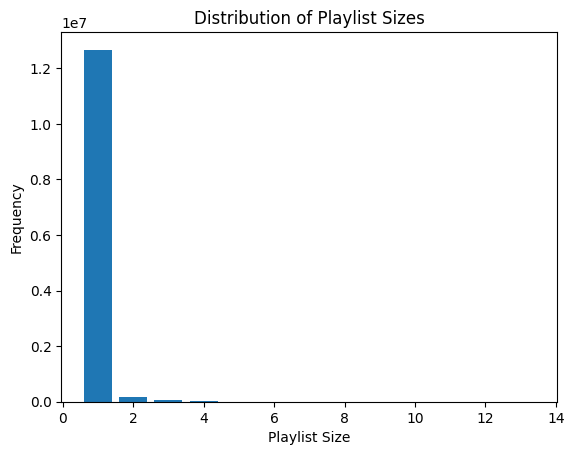

In [7]:
# Distribution of Playlist Sizes
import seaborn as sns
import matplotlib.pyplot as plt

playlist_size = df['playlistname'].apply(lambda x: len(x.split(',')))
plt.bar(playlist_size.value_counts().index, playlist_size.value_counts().values)
plt.xlabel('Playlist Size')
plt.ylabel('Frequency')
plt.title('Distribution of Playlist Sizes')
plt.show()

Majority of playlist sizes are 1, so most portion of playlists consist of single tracks

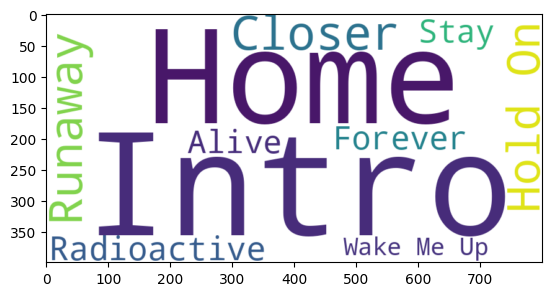

In [8]:
top_n_tracks = df['trackname'].astype(str).value_counts().head(10)
from wordcloud import WordCloud
wordcloud_data = dict(zip(top_n_tracks.index, top_n_tracks.values))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)
plt.imshow(wordcloud, interpolation='bilinear')

## User Segmentation

In [9]:
segmented_df = df.copy()
segmented_df

,user_id,artistname,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010
...,...,...,...,...
12891619,2302bf9c64dc63d88a750215ed187f2c,Mötley Crüe,Wild Side,iPhone
12891620,2302bf9c64dc63d88a750215ed187f2c,John Lennon,Woman,iPhone
12891621,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Don't Know How It Feels,iPhone
12891622,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Wreck Me,iPhone


In [10]:

segmented_df[['user_id', 'playlistname']].value_counts()

user_id                           playlistname                                          
4398de6902abde3351347b048fcdc287  Starred                                                   47362
68756b4d60b6fac27789e85c2b63d1c6  Starred                                                   18510
c410ee930bd5f0e4893632503ec17b05  Starred                                                   18084
f2604a69836c94d00fcd11dd602944fc  everything                                                15824
6b85a8076b4f3b1036ef15f09e2feeeb  Generos                                                   14877
                                                                                            ...  
77fb6aaef631f798992c0e3c341f4376  Happy hardcore                                                1
                                  Drum & Bass                                                   1
b2aa73946de806f318a4931dc6ded72d  Riptide - FlicFlac Edit                                       1
ed7e04b3ac6e8e9bcc87215dc3d84

In [11]:
segmented_df[(segmented_df['user_id'] == '4398de6902abde3351347b048fcdc287') & (segmented_df['playlistname'] == 'Starred')]

,user_id,artistname,trackname,playlistname
6639902,4398de6902abde3351347b048fcdc287,The Gaslight Anthem,"45""""",Starred
6639903,4398de6902abde3351347b048fcdc287,Rebekka Karijord,"I´ve Always Been Jealous of Migratory Birds""""",Starred
6639904,4398de6902abde3351347b048fcdc287,Mutual Benefit,"Let's Play"" / Statue of a Man""",Starred
6639905,4398de6902abde3351347b048fcdc287,Lucius,"Turn It Around""- Spotify Sessions Curated by J...",Starred
6639906,4398de6902abde3351347b048fcdc287,Shakey Graves,"Unlucky Skin"" - Live from Spotify Nyc""",Starred
...,...,...,...,...
6687259,4398de6902abde3351347b048fcdc287,Raised By Swans,Öxnadalur,Starred
6687260,4398de6902abde3351347b048fcdc287,Victor Villarreal,“That Familiar Band” Song,Starred
6687261,4398de6902abde3351347b048fcdc287,Ryan Hemsworth,「Every Square Inch」 - With Qrion,Starred
6687262,4398de6902abde3351347b048fcdc287,Joy Wellboy,﻿Lay Down Your Blade,Starred


In [12]:
segmented_df

,user_id,artistname,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010
...,...,...,...,...
12891619,2302bf9c64dc63d88a750215ed187f2c,Mötley Crüe,Wild Side,iPhone
12891620,2302bf9c64dc63d88a750215ed187f2c,John Lennon,Woman,iPhone
12891621,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Don't Know How It Feels,iPhone
12891622,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Wreck Me,iPhone


In [13]:
segmented_df = segmented_df.drop_duplicates(subset=['user_id', 'playlistname'])
segmented_df['click_count'] = 1
user_item_matrix = segmented_df.groupby(['user_id', 'trackname'])['click_count'].sum().reset_index()

/var/folders/3t/t58dnlt54s5cdr1hhtxqb5hr0000gn/T/ipykernel_2954/2382358588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmented_df['click_count'] = 1


In [14]:
user_item_matrix

,user_id,trackname,click_count
0,00055176fea33f6e027cd3302289378b,18,1
1,0007f3dd09c91198371454c608d47f22,(Everything I Do) I Do It For You,1
2,0007f3dd09c91198371454c608d47f22,2014,1
3,0007f3dd09c91198371454c608d47f22,Hurt,1
4,000b0f32b5739f052b9d40fcc5c41079,A Blessed Christmas Eve,1
...,...,...,...
223428,fff616055993498d6127f3f467cf9f2b,All About It (feat. Ed Sheeran),1
223429,fff616055993498d6127f3f467cf9f2b,All Jacked Up,1
223430,fff616055993498d6127f3f467cf9f2b,Animal (Billboard Remix),1
223431,fff616055993498d6127f3f467cf9f2b,Cinema,1


In [15]:
user_item_matrix

,user_id,trackname,click_count
0,00055176fea33f6e027cd3302289378b,18,1
1,0007f3dd09c91198371454c608d47f22,(Everything I Do) I Do It For You,1
2,0007f3dd09c91198371454c608d47f22,2014,1
3,0007f3dd09c91198371454c608d47f22,Hurt,1
4,000b0f32b5739f052b9d40fcc5c41079,A Blessed Christmas Eve,1
...,...,...,...
223428,fff616055993498d6127f3f467cf9f2b,All About It (feat. Ed Sheeran),1
223429,fff616055993498d6127f3f467cf9f2b,All Jacked Up,1
223430,fff616055993498d6127f3f467cf9f2b,Animal (Billboard Remix),1
223431,fff616055993498d6127f3f467cf9f2b,Cinema,1


In [16]:
# Assuming user_item_matrix is your DataFrame



In [17]:
from scipy.sparse import csr_matrix
numeric_user_item_matrix = user_item_matrix.pivot_table(index='user_id', columns='trackname', values='click_count', fill_value=0)
sparse_user_item_matrix = csr_matrix(numeric_user_item_matrix)

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(sparse_user_item_matrix.T)

In [20]:
track_similarity_df = pd.DataFrame(similarity_matrix, index=numeric_user_item_matrix.columns, columns=numeric_user_item_matrix.columns)

In [21]:
track_similarity_df

trackname,""" (Acoustical ) by Everclear""",15 Years of Tummy Touch Records in Dub,Da,Daedelus - Looking Ocean Ep,"Dios Te Bendiga """"",Episode 22,History O,"Jewel "" Taking Refuge In The Three Jewels""",New Wave,"R.I.P """"",...,他夏了夏天 - Live,凡人的告白書,可愛女人,嘻嘻哈哈過新年,憨阿嬤,虚無の終わり 箱詰めの黙示,虹の彼方 (Kneeeeee Remix),꽃,﻿Before The Sunrise,🐯🐯🐯🐯
trackname,,,,,,,,,,,,,,,,,,,,,
""" (Acoustical ) by Everclear""",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15 Years of Tummy Touch Records in Dub,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Da,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Daedelus - Looking Ocean Ep,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Dios Te Bendiga """"",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
虚無の終わり 箱詰めの黙示,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
虹の彼方 (Kneeeeee Remix),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
꽃,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
track_similarity_df.columns

Index(['            "  (Acoustical ) by Everclear"',
       ' 15 Years of Tummy Touch Records in Dub', ' Da',
       ' Daedelus - Looking Ocean Ep', ' Dios Te Bendiga ""', ' Episode 22',
       ' History O', ' Jewel " Taking Refuge In The Three Jewels"',
       ' New Wave', ' R.I.P ""',
       ...
       '他夏了夏天 - Live', '凡人的告白書', '可愛女人', '嘻嘻哈哈過新年', '憨阿嬤', '虚無の終わり 箱詰めの黙示',
       '虹の彼方 (Kneeeeee Remix)', '꽃', '﻿Before The Sunrise', '🐯🐯🐯🐯'],
      dtype='object', name='trackname', length=78499)

In [23]:
track_similarity_df.index.name = None
track_similarity_df

,""" (Acoustical ) by Everclear""",15 Years of Tummy Touch Records in Dub,Da,Daedelus - Looking Ocean Ep,"Dios Te Bendiga """"",Episode 22,History O,"Jewel "" Taking Refuge In The Three Jewels""",New Wave,"R.I.P """"",...,他夏了夏天 - Live,凡人的告白書,可愛女人,嘻嘻哈哈過新年,憨阿嬤,虚無の終わり 箱詰めの黙示,虹の彼方 (Kneeeeee Remix),꽃,﻿Before The Sunrise,🐯🐯🐯🐯
""" (Acoustical ) by Everclear""",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15 Years of Tummy Touch Records in Dub,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Da,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Daedelus - Looking Ocean Ep,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Dios Te Bendiga """"",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
虚無の終わり 箱詰めの黙示,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
虹の彼方 (Kneeeeee Remix),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
꽃,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
﻿Before The Sunrise,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
track_similarity_df[' New Wave'].sort_values(ascending=False)[1:5+1].index


Index(['African Sleigh Ride', 'A Little Something Refreshing',
       'Dead Man's Party', '4 In The Morning', 'Alligator'],
      dtype='object')

In [39]:
#pip install openai


  Obtaining dependency information for openai from https://files.pythonhosted.org/packages/30/1d/27c3571504fb6fb1e9f7c906d93590ead22f5f34910489e155ee28512eeb/openai-1.3.5-py3-none-any.whl.metadata
  Obtaining dependency information for anyio<4,>=3.5.0 from https://files.pythonhosted.org/packages/19/24/44299477fe7dcc9cb58d0a57d5a7588d6af2ff403fdd2d47a246c91a3246/anyio-3.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for httpx<1,>=0.23.0 from https://files.pythonhosted.org/packages/a2/65/6940eeb21dcb2953778a6895281c179efd9100463ff08cb6232bb6480da7/httpx-0.25.2-py3-none-any.whl.metadata
  Obtaining dependency information for pydantic<3,>=1.9.0 from https://files.pythonhosted.org/packages/0a/2b/64066de1c4cf3d4ed623beeb3bbf3f8d0cc26661f1e7d180ec5eb66b75a5/pydantic-2.5.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 2.8 MB/s eta 0:00:00
  Using cached sniffio-1.3.0-py3-none-any.whl (10 kB)
  Obtaining dependency information for excepti

In [ ]:
def generate_song_descriptions(song):
    generator = pipeline('text-generation', 'gpt2')
    set_seed(42)
    output = generator(song, max_length=30, num_return_sequences=5, top_k=50)
    return output

In [4]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
output = generator("Before the Sunrise", max_length=30, num_return_sequences=5, top_k=50)


/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [30]:
sentiment_analyzer = pipeline("sentiment-analysis")
sequence_scores = []
for sequence in output:
    sentiment_score = sentiment_analyzer(sequence['generated_text'])[0]["score"]
    total_score = sentiment_score
    sequence_scores.append([sequence['generated_text'], total_score])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [31]:
sequence_scores

[['Before the Sunrise, the moon once again held an important role, and this time the planet Earth was not on the verge of losing its orbit.\n\n',
  0.9856361150741577],
 ['Before the Sunrise and Sunset, and even then, we got a very pleasant couple of summers. With my new home, I decided to try and find',
  0.9983773231506348],
 ['Before the Sunrise was announced to be a new show with a single song, it was quickly confirmed by the Hollywood Reporter that that title is all but taken',
  0.9962008595466614],
 ['Before the Sunrise was the scene we encountered the rest of Czars. Everyone was shocked in no uncertain terms. As before, we had gone to',
  0.9873337745666504],
 ['Before the Sunrise, he had received a call from his father stating that he had found a cave in a large rock formation that was inaccessible to humans.',
  0.9893956780433655]]

In [33]:
sequence_scores.sort(key=lambda x: x[1], reverse=True)
sequence_scores

[['Before the Sunrise and Sunset, and even then, we got a very pleasant couple of summers. With my new home, I decided to try and find',
  0.9983773231506348],
 ['Before the Sunrise was announced to be a new show with a single song, it was quickly confirmed by the Hollywood Reporter that that title is all but taken',
  0.9962008595466614],
 ['Before the Sunrise, he had received a call from his father stating that he had found a cave in a large rock formation that was inaccessible to humans.',
  0.9893956780433655],
 ['Before the Sunrise was the scene we encountered the rest of Czars. Everyone was shocked in no uncertain terms. As before, we had gone to',
  0.9873337745666504],
 ['Before the Sunrise, the moon once again held an important role, and this time the planet Earth was not on the verge of losing its orbit.\n\n',
  0.9856361150741577]]

In [2]:
pip install levenshtein

  Obtaining dependency information for levenshtein from https://files.pythonhosted.org/packages/0f/55/dab3f8e4e620766c3fc9cf3a326d61e10ed32559d8b46be381d57f93812a/Levenshtein-0.23.0-cp310-cp310-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for rapidfuzz<4.0.0,>=3.1.0 from https://files.pythonhosted.org/packages/d0/44/279a4b8ac631f65a5168651ed1bdef20a996a50a693464fca5410a8239c2/rapidfuzz-3.5.2-cp310-cp310-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
from Levenshtein import distance
scores = []
for val in range(len(output)):
    for val_2 in range(1, len(output)):
        score = distance(output[val]['generated_text'], output[val_2]['generated_text'])
        scores.append([output[val]['generated_text'], output[val_2]['generated_text'], score])
scores

[['Before the Sunrise, the moon once again held an important role, and this time the planet Earth was not on the verge of losing its orbit.\n\n',
  'Before the Sunrise and Sunset, and even then, we got a very pleasant couple of summers. With my new home, I decided to try and find',
  91],
 ['Before the Sunrise, the moon once again held an important role, and this time the planet Earth was not on the verge of losing its orbit.\n\n',
  'Before the Sunrise was announced to be a new show with a single song, it was quickly confirmed by the Hollywood Reporter that that title is all but taken',
  103],
 ['Before the Sunrise, the moon once again held an important role, and this time the planet Earth was not on the verge of losing its orbit.\n\n',
  'Before the Sunrise was the scene we encountered the rest of Czars. Everyone was shocked in no uncertain terms. As before, we had gone to',
  95],
 ['Before the Sunrise, the moon once again held an important role, and this time the planet Earth was 

In [37]:
scores.sort(key=lambda x: x[2], reverse=True)
scores

[['Before the Sunrise, the moon once again held an important role, and this time the planet Earth was not on the verge of losing its orbit.\n\n',
  'Before the Sunrise was announced to be a new show with a single song, it was quickly confirmed by the Hollywood Reporter that that title is all but taken',
  103],
 ['Before the Sunrise and Sunset, and even then, we got a very pleasant couple of summers. With my new home, I decided to try and find',
  'Before the Sunrise, he had received a call from his father stating that he had found a cave in a large rock formation that was inaccessible to humans.',
  103],
 ['Before the Sunrise, he had received a call from his father stating that he had found a cave in a large rock formation that was inaccessible to humans.',
  'Before the Sunrise and Sunset, and even then, we got a very pleasant couple of summers. With my new home, I decided to try and find',
  103],
 ['Before the Sunrise and Sunset, and even then, we got a very pleasant couple of sum

In [38]:
scores[:5]

[['Before the Sunrise, the moon once again held an important role, and this time the planet Earth was not on the verge of losing its orbit.\n\n',
  'Before the Sunrise was announced to be a new show with a single song, it was quickly confirmed by the Hollywood Reporter that that title is all but taken',
  103],
 ['Before the Sunrise and Sunset, and even then, we got a very pleasant couple of summers. With my new home, I decided to try and find',
  'Before the Sunrise, he had received a call from his father stating that he had found a cave in a large rock formation that was inaccessible to humans.',
  103],
 ['Before the Sunrise, he had received a call from his father stating that he had found a cave in a large rock formation that was inaccessible to humans.',
  'Before the Sunrise and Sunset, and even then, we got a very pleasant couple of summers. With my new home, I decided to try and find',
  103],
 ['Before the Sunrise and Sunset, and even then, we got a very pleasant couple of sum

In [41]:
sentiment_weight, levenshtein_weight = 0.7, 0.3
combined_scores = []
for sentiment_entry, levenshtein_entry in zip(sequence_scores, scores):
    sentiment_sentence, sentiment_score = sentiment_entry
    levenshtein_sent_1, levenshtein_sent_2, levenshtein_score = levenshtein_entry

    # Normalize sentiment score (assuming sentiment score is in the range [0, 1])
    normalized_sentiment_score = sentiment_score

    # Combine scores using weighted average
    combined_score = (sentiment_weight * normalized_sentiment_score) + (levenshtein_weight * levenshtein_score)

    # Store the combined score along with the sequences
    combined_scores.append([sentiment_sentence, levenshtein_sent_1, levenshtein_sent_2, combined_score])

# Sort the combined scores based on the combined score
sorted_combined_scores = sorted(combined_scores, key=lambda x: x[3], reverse=True)

# Select the top sequence
top_sequence = sorted_combined_scores[0]

print("Top Sequence:", top_sequence)

Top Sequence: ['Before the Sunrise and Sunset, and even then, we got a very pleasant couple of summers. With my new home, I decided to try and find', 'Before the Sunrise, the moon once again held an important role, and this time the planet Earth was not on the verge of losing its orbit.\n\n', 'Before the Sunrise was announced to be a new show with a single song, it was quickly confirmed by the Hollywood Reporter that that title is all but taken', 31.59886412620544]


## A/B Hypothesis Testing


In [ ]:
import numpy as np
hypothesis_df = track_similarity_df.copy()
hypothesis_df['version'] = np.random.choice(['A', 'B'], size=len(df))
hypothesis_df

NameError: name 'track_similarity_df' is not defined

In [ ]:
for version in hypothesis_df['version'].unique():
    group_data = hypothesis_df[hypothesis_df['version'] == version][